<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

파이썬에서는 이런 종류의 파일을 아주 손쉽게 읽을 수 있는 모듈이 있습니다. 바로 pandas라는 모듈입니다.

In [2]:
import pandas as pd


아마 앞으로도 위 코드처럼 대부분의 시작은 import로 할게 될 겁니다. 파이썬에서 원하는 모듈을 불러오는 명령이 import 입니다. 그 뒤에 원하는 모듈명을 넣게 됩니다. 모듈명 다음의 as는 as뒤에 붙는 pd 라는 짧은 단어로 pandas를 대체하겠다는 뜻입니다. 즉, pandas의 read_csv라는 의미로 pandas에서 CSV 파일을 읽는 명령은 read_csv입니다. 그 안에 한글을 사용하는 경우는 인코딩에서 신경 써야합니다. 우리가 받은 CCTV 데이터는 UTF-8로 인코딩이되어 있어서 read_csv 명령을 쓸 때 encoding 옵션에 UTF-8이라고 지정합니다. 이때 사용된 head()명령은 pandas 데이터의 첫 5행만 보여달라는 것입니다.

In [3]:
CCTV_Seoul = pd.read_csv("data/01. CCTV_in_Seoul.csv", encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pnadas 데이터는 제일 첫 줄에 보이는 것이 해당하는 열(column)을 대표하는 일종의 제목입니다. 그래서 첫 줄을 특별히 column이라고 합니다. 데이터 뒤에 column의 이름들이 반환 됩니다.

In [8]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

그런데 기관명이라고 되어 있으니 이를 '구별'이라는 이름으로 하겠습니다. 이렇게 이름을 바꾸는 명령은 rename이라고 합니다. 그리고 그 명령 안에 사용된 inplace =True는 실제 CCTV_Seoul이라는 변수의 내용을 갱신하라는 의미입니다.

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


이제 두 번째 받은 엑셀 파일을 읽어야 합니다. 그 명령은 read_excel입니다. 그냥 인코딩만 지정하고 읽었더니 약간 이상합니다. 그것은 원본 엑셀 파일이 그림 1-8에서 보는 것처럼 첫 세줄이 열의 제목 처럼되어 있기 때문입니다.

In [5]:
pop_Seoul = pd.read_csv("data/01. population_in_Seoul.csv", encoding='utf-8')
pop_Seoul.head()


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2,20764


데이터가 처음에 엑셀로 되어 있어서 csv로 변환 시켜주었다. 그러나 이는 보니 1~3행이 알수가 없어서 다음의 옵션을 주자.

In [6]:
pop_Seoul = pd.read_csv("data/01. population_in_Seoul.csv", 
                        header = 2,
                        encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.0,1321458
1,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.0,25425
2,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.0,20764
3,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.0,36231
4,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.0,39997


옵션설정

In [7]:
pop_Seoul = pop_Seoul.iloc[:, [1,3,6, 9,13]]

In [13]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


출력된 모습도 간결하게 되었습니다. 그러나 컬럼의 이름에 문제가 있는 듯합니다. rename 명령을 사용해서 컬럼의 이름을 변경합니다.

In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


이제 어느 정도 정리된 것 같습니다. CCTV_Seoul이라는 변수에는 '구별 CCTV현황'을, pop_Seoul이라는 변수에는 '구별 인구 현황'을 저장했습니다. pandas에서 몇 줄 입력하지 않았는데 우리는 두 종류의 파일을 보기 좋게 읽게 되었습니다.

#### 1-3 pandas 기초 익히기

이 책이 목적을 이루는 과정을 더 중요하게 다루지만 그래도 책 전반에 걸쳐 pandas의 사용 빈도가 높아서 기초를 익히고 지나가겠습니다. 빠르게 진행할 테니 집중하세요. 그리고 본 절의 튜토리얼은 pandas의 튜토리얼이 다수 포함되어 있습니다.

In [15]:
import pandas as pd
import numpy as np

pandad 와 Numpy를 import했습니다. 이 두 모듈은 자주 사용되는 모듈이면서 둘을 함께 쓰면 유용할때가 많습니다.

In [16]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pandas의 데이터 유형 중 기초가 되는 것이 Series 입니다. 대괄호로 만드는 파이썬의 list 데이터로만 만들 수 있습니다. 중간에 NaN(Not A Number)도 넣었습니다.

In [17]:
dates = pd.date_range('20130101', periods = 6 )
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

또 pandas에는 날짜형의 데이터인 date_range가 있습니다. 기본 날짜를 지정하고 periods 옵션으로 6일간이라고 지정합니다.

In [18]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns = ['A','B','C','D'])
                                                                
df
                                                        

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175
2013-01-05,0.330198,1.801388,-0.712092,1.295459
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441


이제 DataFrame 유형의 데이터를 만듭니다. 6행 4열의 random 변수를 만들고, 컬럼에는 columns=['A','B','C','D']로 지정하고, index 명령으로 코드 [11]에서 만든 날짜형 데이터인 dates를 index=dates 옵션을 이용해서 지정했습니다.

In [19]:
df.head(3)

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524


head() 명령을 사용하면 기본적으로 첫 5행을 보여줍니다. 괄호 안에 숫자를 넣어두면 그 숫자만큼의 행을 볼 수 있습니다.

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

그리고 index, columns 명령을 이용하면 pandas의 DataFrame의 컬럼과 인덱스를 확인할 수 있습니다.

In [22]:
df.values

array([[-0.40289194,  0.91297561,  0.90188572, -1.02785774],
       [-0.77091568, -0.16175357, -0.57390368, -0.9644828 ],
       [-0.2537233 , -0.10234145,  0.72824562,  0.25852407],
       [-0.10502442,  0.77685645, -0.07301992, -1.5601749 ],
       [ 0.33019809,  1.80138817, -0.71209214,  1.29545879],
       [-0.19069374,  0.54047026, -0.47892646, -0.17644145]])

그리고 그 안에 들어가는 내용은 values 명령으로 확인할 수 있습니다. 또 info() 명령을 사용하면 DataFrame의 개요를 알 수 있습니다.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


describe() 명령을 사용하면 통계적 개요를 확인 할 수 있습니다. 코드[19]에서처럼 개수(count)와 평균(mean)뿐만 아니라 min,max와 각 1/4지점, 표준편차까지 한 번에 알 수 있습니다.

In [24]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.232175,0.627933,-0.034635,-0.362496
std,0.361663,0.727321,0.693929,1.040060
min,-0.770916,-0.161754,-0.712092,-1.560175
25%,-0.365600,0.058361,-0.550159,-1.012014
50%,-0.222209,0.658663,-0.275973,-0.570462
75%,-0.126442,0.878946,0.527929,0.149783
max,0.330198,1.801388,0.901886,1.295459


이때 values가 숫자가 아니라 문자라고 하더라고 그에 맞는 개요가 나타납니다.

In [25]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,0.330198,1.801388,-0.712092,1.295459
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483



sort_values 명령은 by로 지정된 컬럼을 기준으로 정렬합니다. ascending 옵션을 사용하면 내림차순이나 오름차순으로 정렬시킬 수 있습니다.

In [26]:
df

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175
2013-01-05,0.330198,1.801388,-0.712092,1.295459
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441


그냥 변수명을 적고 실행(shift+enter)하면 그 내용이 나타납니다. 내용이 너무 많은 경우는 jupyter notebook에서 내용을 줄여서 보여줍니다.

In [27]:
df['A']

2013-01-01   -0.402892
2013-01-02   -0.770916
2013-01-03   -0.253723
2013-01-04   -0.105024
2013-01-05    0.330198
2013-01-06   -0.190694
Freq: D, Name: A, dtype: float64

DataFrame으로 선언된 변수의 경우 변수명 뒤에 ['A']와 같이 붙여주면 해당 컬럼만 Series로 보여줍니다. 물론 head()라는 명령이 있지만 중간부터 보고 싶다면 행의 범위만 지정해서 df[0:3]이라고 하면 됩니다.

In [28]:
df[0:3]

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524


만약 2013.01.02 부터 2013.01.04까지의 행을 보고 싶다면 df['20130102':20130104']라고 하면 됩니다.

In [29]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175


[11]에서 만든 dates 변수를 이용해서 특정 날짜의 데이터만 보고 싶으면 df.loc 명령을 사용하면 됩니다. loc는 location 옵션으로 슬라이싱(우리가 지금하고 있는 겁니다)할 때 loc 옵션을 이용해서 위치값을 지정할 수 있습니다.

In [30]:
df.loc[dates[0]]

A   -0.402892
B    0.912976
C    0.901886
D   -1.027858
Name: 2013-01-01 00:00:00, dtype: float64

A,B 열의 모든 행을 보고 싶다면 df.loc[:,['A','B']]라고 하면 됩니다.


In [31]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.402892,0.912976
2013-01-02,-0.770916,-0.161754
2013-01-03,-0.253723,-0.102341
2013-01-04,-0.105024,0.776856
2013-01-05,0.330198,1.801388
2013-01-06,-0.190694,0.540470


물론 행과 열의 범위를 모두 지정할 수도 있습니다.

In [32]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.770916,-0.161754
2013-01-03,-0.253723,-0.102341
2013-01-04,-0.105024,0.776856


2013년 1월 2일부터 2013년 1월 4일까지의 데이터 중 A와 B 컬럼의 데이터만 선택하는 것입니다.

In [33]:
df.loc['20130102',['A','B']]

A   -0.770916
B   -0.161754
Name: 2013-01-02 00:00:00, dtype: float64

또, 2013년 1월 2일의 A, B 컬럼의 내용을 확인하는 것입니다.

In [34]:
df.loc[dates[0], 'A']

-0.4028919421012905

그리고 코드[11]에 있는 dates[0]에 맞는 날짜인 2013년 1월 1일에 A컬럼의 데이터만 확인할 수 있습니다. 그러나 loc 명령과 달리 행과 열의 번호를 이용해서 데이터에 바로 접근하고 싶을 수 있는데, 그 명령이 iloc입니다. iloc을 사용하면 행이나 열의 범위를 지정하면 됩니다. 특히 콜론(:)을 사용하면 전체를 의미합니다.

In [35]:
df.iloc[3]

A   -0.105024
B    0.776856
C   -0.073020
D   -1.560175
Name: 2013-01-04 00:00:00, dtype: float64

먼저 iloc에 단지 숫자만 표시하면 3번 행을 의미합니다(0번부터 시작하니까 4번 행이 됩니다.)

In [36]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.105024,0.776856
2013-01-05,0.330198,1.801388


또 3번째부터 5번째 앞, 즉 3번째부터 4번째까지 행과 0번부터 1번까지 열의 데이터만 가져올 수 있습니다.

In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.770916,-0.573904
2013-01-03,-0.253723,0.728246
2013-01-05,0.330198,-0.712092


또 범위가 아니라 콤마(,)로 행이나 열을 지정해서 데이터를 가져올 수 있습니다. 행이나 열에 대한 한쪽은 전체를 의미하게 하고 싶을 때는 그냥 콜란만 사용하면 됩니다.

In [38]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524


이렇게 행은 범위를 주고, 열은 콜론으로 전체를 의미하게 하는 것입니다.

In [39]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.912976,0.901886
2013-01-02,-0.161754,-0.573904
2013-01-03,-0.102341,0.728246
2013-01-04,0.776856,-0.073020
2013-01-05,1.801388,-0.712092
2013-01-06,0.540470,-0.478926


반대로 행을 전체로 선택했습니다. 다시 df를 호출하겠습니다.

In [40]:
df

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175
2013-01-05,0.330198,1.801388,-0.712092,1.295459
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441


DataFrame에서 특정 조건을 만족하는 데이터만 얻을 수 있습니다. 컬럼을 지정할 때 df['A']처럼 할 수도 있고, df.A 와 같이 할 수도 있습니다. 컬럼 A에서 0보다 큰 행만 얻는 것입니다. 

In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-05,0.330198,1.801388,-0.712092,1.295459


데이터 전체에서 조건을 걸면 만족하지 않은 곳은 NaN 처리가 됩니다.

In [42]:
df[df > 0 ]

,A,B,C,D
2013-01-01,NaN,0.912976,0.901886,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,0.728246,0.258524
2013-01-04,NaN,0.776856,NaN,NaN
2013-01-05,0.330198,1.801388,NaN,1.295459
2013-01-06,NaN,0.540470,NaN,NaN


DataFrame을 복사할 때는 그냥 = 기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 됩니다.

In [43]:
df2 = df.copy()

데이터의 내용까지 복사하라는 지령은 copy() 옵션을 붙여 넣으면 됩니다.

In [44]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.402892,0.912976,0.901886,-1.027858,one
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483,one
2013-01-03,-0.253723,-0.102341,0.728246,0.258524,two
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175,three
2013-01-05,0.330198,1.801388,-0.712092,1.295459,four
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441,three


원래 있는 DataFrame에서 새로운 컬럼을 추가하는 것은 코드[39]에서처럼 하면 됩니다.

In [45]:
df2

,A,B,C,D,E
2013-01-01,-0.402892,0.912976,0.901886,-1.027858,one
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483,one
2013-01-03,-0.253723,-0.102341,0.728246,0.258524,two
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175,three
2013-01-05,0.330198,1.801388,-0.712092,1.295459,four
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441,three


In [46]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

이렇게 만든 E 컬렘에서 two와 four가 있는지 조건을 걸고 싶을 때는 isin 명령을 쓰면 좋습니다.

In [47]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.253723,-0.102341,0.728246,0.258524,two
2013-01-05,0.330198,1.801388,-0.712092,1.295459,four


그 결과는 True/False로 반환되는데, 이것을 이용하면 조건에 맞는 데이터를 선택할 수 있습니다.

In [48]:
df

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-0.770916,-0.161754,-0.573904,-0.964483
2013-01-03,-0.253723,-0.102341,0.728246,0.258524
2013-01-04,-0.105024,0.776856,-0.073020,-1.560175
2013-01-05,0.330198,1.801388,-0.712092,1.295459
2013-01-06,-0.190694,0.540470,-0.478926,-0.176441


df 변수에 좀더 통계 느낌의 데이터를 볼 때는 특정 함수를 적용시키면 좋습니다. 이때 사용하는 것이 apply 명령입니다. 누적합을 알고 싶을 때는 numpy의 cumsum을 이용하면 됩니다.

In [49]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.402892,0.912976,0.901886,-1.027858
2013-01-02,-1.173808,0.751222,0.327982,-1.992341
2013-01-03,-1.427531,0.648881,1.056228,-1.733816
2013-01-04,-1.532555,1.425737,0.983208,-3.293991
2013-01-05,-1.202357,3.227125,0.271116,-1.998533
2013-01-06,-1.393051,3.767595,-0.207811,-2.174974


특별히 최대값과 최소값의 차이(혹은 거리)를 알고 싶다면 one-line 함수인 lambda를 이용할 수도 있습니다.

In [50]:
df.apply(lambda x: x.max() - x.min())

A    1.101114
B    1.963142
C    1.613978
D    2.855634
dtype: float64

### 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

이제 기초가 되는 pandas도 익혔으니 두 데이터를 정리해 보겠습니다.

In [51]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


구별 CCTV 데이터에서 CCTV 전체 개수인 소계로 정렬하겠습니다.

In [52]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


CCTV의 전체 개수가 가장 작은 구는 '도봉구','마포구','송파구','중구'라는 것을 알 수 있습니다. 의아스러운 것은 강남 3구 중 하나인 송파구가 CCTV가 가장 적은 구 중 하나라는 것인데, 2장에서 보면 송파구는 범죄율이 결코 낮은 구가 아닙니다. 그런데 CCTV가 적은 구 중에 하나입니다.

In [53]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


그리고 CCTV가 가장 많은 구는 '강남구','양천구','서초구','은평구','용산구'로 나타납니다. 특히 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율을 계산하겠습니다.

In [9]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


그 결과를 보면 최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 '종로구','도봉구','마포구','노원구','강동구' 라는 것도 알 수 있습니다. 이제 서울시 인구 현황을 정리해보겠습니다.

In [55]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


먼저 pop_Seoul 변수를 확인했더니 0번 행에 합계가 보입니다. 아마 서울시 전체 합계를 넣어둔 것같은데 우리에게는 필요가 없습니다. 이럴 때는 행을 지우는 drop 명령을 사용해서 지우도록 합니다.

In [10]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997
5,광진구,372164,357211,14953,42214


그리고 pop_Seoul 데이터의 '구별' 컬럼의 unique를 조사합니다. 유니크 조사는 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터를 확인하는 것입니다.

In [57]:

pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

이렇게 유니크 조사를 했더니 제일 끝에 Nan이 보입니다. NaN이 어디에 있는지 확인하기 위해서는 조건문을 사용해야 합니다. isnull 명령으로 NaN 데이터를 추출할 수 있습니다.

In [58]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


행을 지우는 drop 명령으로 NaN이 있던 행을 삭제합니다.

이제 각 구별 전체 인구를 이용해서 구별 '외국인비율'과'고령자비율'을 계산하겠습니다.

In [11]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849


인구수로 정렬했더니 '송파구','강서구','강남구','노원구',관악구' 순으로 인구가 많습니다.

In [60]:
pop_Seoul.sort_values(by='인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


In [61]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
17,구로구,447874,416487,31387,56833,7.007998,12.689506
18,금천구,255082,236353,18729,32970,7.342345,12.925255
21,관악구,525515,507203,18312,68082,3.484582,12.955291
6,동대문구,369496,354079,15417,54173,4.172440,14.661322


In [62]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
18,금천구,255082,236353,18729,32970,7.342345,12.925255
17,구로구,447874,416487,31387,56833,7.007998,12.689506
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427


In [63]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772,597248,6524,72548,1.080540,12.015794
24,송파구,667483,660584,6899,72506,1.033584,10.862599
12,은평구,494388,489943,4445,72334,0.899091,14.631019
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


In [64]:
pop_Seoul.sort_values(by='고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192,326686,3506,54813,1.061806,16.600342
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797


이제 고령자와 고령자 비율을 조사해보겠습니다.인구 대비 CCTV 현황 같은 내용을 확인하고 싶은데, 그리거 위해서는 두 데이터를 병합해야 합니다.

#### 1-5 pnadas 고급기능 , 두 DataFrame 병합하기

진도를 나가기 전에 pandas의 고급 기능 중 하나를 알고 가면 좋을 것 같습니다.

In [65]:
import pandas as pd

df1 = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                   'B':['B0', 'B1', 'B2', 'B3'],
                   'C':['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']},
                  index=[0,1,2,3])
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6', 'A7'],
                   'B':['B4', 'B5', 'B6', 'B7'],
                   'C':['C4', 'C5', 'C6', 'C7'],
                   'D': ['D4', 'D5', 'D6', 'D7']},
                  index=[4,5,6,7])
df3 = pd.DataFrame({'A':['A8', 'A9', 'A10', 'A11'],
                   'B':['B8', 'B9', 'B10', 'B11'],
                   'C':['C8', 'C9', 'C10', 'C11'],
                   'D': ['D8', 'D9', 'D10', 'D11']},
                  index=[8,9,10,11])

In [66]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [67]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [68]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


이렇게 만든 데이터를 열 방향으로 단순히 합치는 것은 concat 명령입니다.

In [69]:
result= pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


단순하게 아무 옵션 없이 그냥 사용하면 열 방향으로 병합합니다.

In [70]:
result = pd.concat([df1, df2, df3], keys = ['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

특별히 concat 명령에 keys 옵션으로 구불할 수 있습니다. 이렇게 key 지정된 구분은 다중 index가 되어서 level을 형성합니다. 이를 확인하면,

In [71]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [72]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [73]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [74]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                   'D': ['D2', 'D3', 'D6', 'D7'],
                   'F':['F2', 'F3', 'F6' , 'F7']},
                  index=[2,3,6,7])
result = pd.concat([df1, df4], axis=1)

이렇게 만든 df4와 df1을,

In [75]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [76]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


옵션인 axis=1을 주어서 concat시켜보면,

In [77]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


이런 결과를 얻게 됩니다. df1의 index가 0,1,2,3 이고, df4의 index가 2,3,6,7 인데 concat 명령은 index를 기준으로 데이터를 합치기 때문입니다. 그래서 값을 가질 수 없는 곳에서 NaN이 저장됩니다. 이때 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'옵션입니다.

In [78]:
result = pd.concat([df1, df4], axis =1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


또 join_axes = [df1.index] 옵션으로 df1의 인덱스에 맞추도록 할 수도 있습니다.

In [79]:
result = pd.concat([df1, df4], axis=1 , join_axes = [df1.index])
result


TypeError: concat() got an unexpected keyword argument 'join_axes'

In [80]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

TypeError: concat() got an unexpected keyword argument 'join_axes'

concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index=True라고 옵션을 잡으면 두 데이터의 index를 무시하고 합치 후 다시 index를 부여합니다. 이때는 열을 기준으로 합치게 됩니다.

In [81]:
result= pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


이제는 다른 명령을 하나 더 학습하겠습니다. 일단 데이터를 두개 만듭니다.

In [82]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})


In [83]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [84]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


이렇게 만든 두 데이터에 공통으로 있는 컬럼인 key를 기준으로 merge 명령에서 merge 기준을 설정하는 on옵션으로 합치면 공통된 key에 대해서만 합치게 됩니다.

In [85]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


합치는 두 데이터를 하나씩 기준으로 합칠 수도 있습니다. 이때 how 옵션으로 한쪽 데이터를 설정하면 됩니다.

In [86]:
pd.merge(left, right,how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [87]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


또 merge한 데이터 결과를 모두 가지는 outer 옵션이 있습니다. 이 옵션을 사용하면 마치 합집합처럼 merge가 되며 공통된 요소가 아닌 곳은 NaN 처리가 됩니다.

In [88]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


그리고 outer의 반대로 inner 옵션이 있습니다. 이 옵션은 교집합처럼 공통된 요소만 가집니다.

In [89]:
pd.merge(left, right, how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

1-5절에서 배운 대로 merge 명령으로 합치도록 하겠습니다. 당연히 두 데이터의 공통된 컬럼인 '구별'로 merge하면 됩니다.

In [12]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()


data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [13]:
# !pip3 install matplotlib

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [19]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [16]:
platform.system()

'Linux'

이제 한글폰트를 넣어 주었으니 plot를 그려 보자. kind='barh'옵션을 지정해주어 수평(bar)로 해놓았고, grid=True로 grid를 해주었고, figsize로 그림크기를 지정해주었다.

<AxesSubplot:ylabel='구별'>

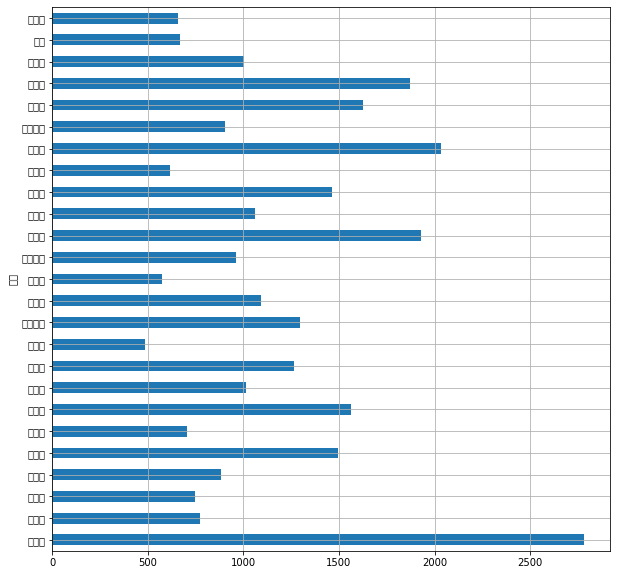

In [20]:
data_result['소계'].plot(kind='barh', grid = True, figsize=(10,10))

In [106]:
import matplotlib.pyplot as plt

In [107]:
plt.rc('font', family='NanumGothic')

In [7]:
%matplotlib inline

<AxesSubplot:ylabel='구별'>

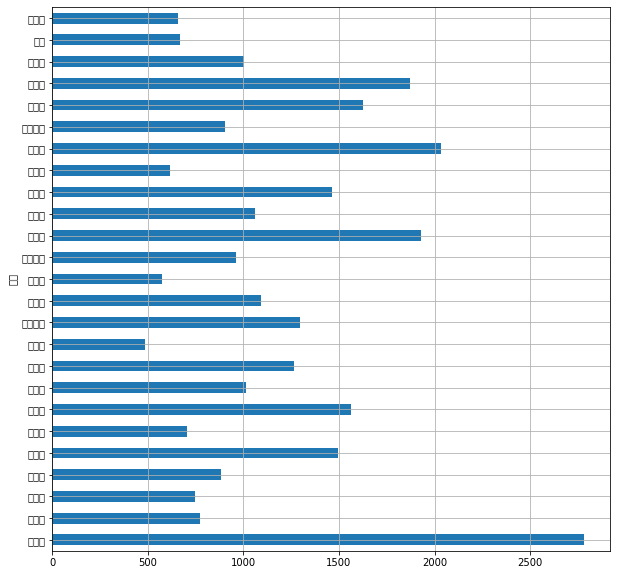

In [18]:
data_result['소계'].plot(kind='barh', grid = True, figsize=(10,10))

In [4]:
import pandas as pd
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

NameError: name 'pop_Seoul' is not defined

In [95]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

KeyError: '구별'

In [97]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
1,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.0,25425
2,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.0,20764
3,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.0,36231
4,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.0,39997
5,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.0,42214


In [98]:

pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

KeyError: '[0] not found in axis'